<a href="https://colab.research.google.com/github/DiogoVilasBoas/Estudo/blob/master/DeepLearnig%20with%20Keras%20parte%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [0]:
#imports
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [0]:
#carregar o dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados

9

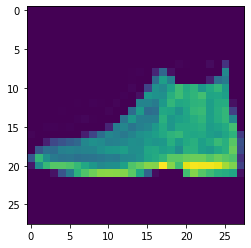

In [3]:
#explorar os dados
plt.imshow(imagens_teste[0])
total_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

Exibição dos dados

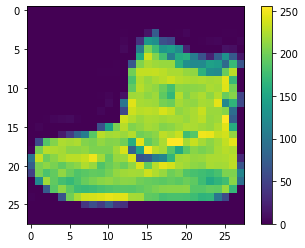

In [4]:
#exibir os dados
'''
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalização

In [0]:
#normalização
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)),   
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs =5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5336 - accuracy: 0.8115 - val_loss: 0.4228 - val_accuracy: 0.8516
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3982 - accuracy: 0.8554 - val_loss: 0.3712 - val_accuracy: 0.8665
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3638 - accuracy: 0.8664 - val_loss: 0.3533 - val_accuracy: 0.8703
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3417 - accuracy: 0.8741 - val_loss: 0.3367 - val_accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3220 - accuracy: 0.8815 - val_loss: 0.3306 - val_accuracy: 0.8826


Salvando o modelo

In [7]:
#salvar modelo
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Analisando o Under e o Overfiting do modelo

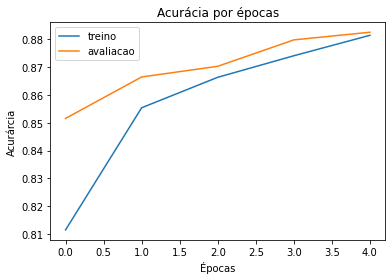

In [8]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurárcia')
plt.legend(['treino','avaliacao'])

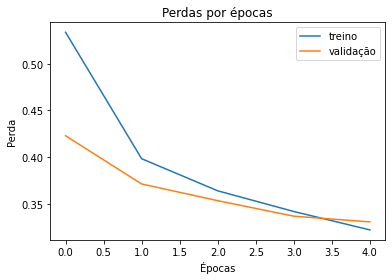

In [9]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino','validação'])

Saída

In [10]:
#amostra de exemplo
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2


In [11]:
#resultado
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:{:2.4}'.format(perda_teste))
print('Acurácia do teste:{:2.2%}'.format(acuracia_teste))

313/313 [==============================] - 0s 2ms/step - loss: 53.5067 - accuracy: 0.8583
Perda do teste:53.51
Acurácia do teste:85.83%
